# Impact of hyperparameter tuning in FL scenarios

We investigate the impact of client learning rate and number of local epochs on accuracy of the resulting model.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [2]:
# paths for tensorboard log files
paths = ["./results/lr-0.01-epochs-1",
         "./results/lr-0.03-epochs-1",
         "./results/lr-0.05-epochs-1",
         "./results/lr-0.01-epochs-5",
         "./results/lr-0.03-epochs-5",
         "./results/lr-0.05-epochs-5"]

In [3]:
accumulators = [EventAccumulator(path) for path in paths]
for acc in accumulators:
    acc.Reload()
    
data_cli_1 = [pd.DataFrame(acc.Scalars('Accuracy/client_0'))
              .drop('wall_time', axis=1)
              .query('step >= 5 and step <=100')
              .rename(columns={"step": "total_epochs", "value": "local_accuracy"})
              for acc in accumulators]

data_cli_2 = [pd.DataFrame(acc.Scalars('Accuracy/client_1'))
              .drop('wall_time', axis=1)
              .query('step >= 5 and step <=100')
              .rename(columns={"step": "total_epochs", "value": "local_accuracy"})
              for acc in accumulators]

data_cli_3 = [pd.DataFrame(acc.Scalars('Accuracy/client_2'))
              .drop('wall_time', axis=1)
              .query('step >= 5 and step <=100')
              .rename(columns={"step": "total_epochs", "value": "local_accuracy"})
              for acc in accumulators]

data_cli_4 = [pd.DataFrame(acc.Scalars('Accuracy/client_3'))
              .drop('wall_time', axis=1)
              .query('step >= 5 and step <=100')
              .rename(columns={"step": "total_epochs", "value": "local_accuracy"})
              for acc in accumulators]

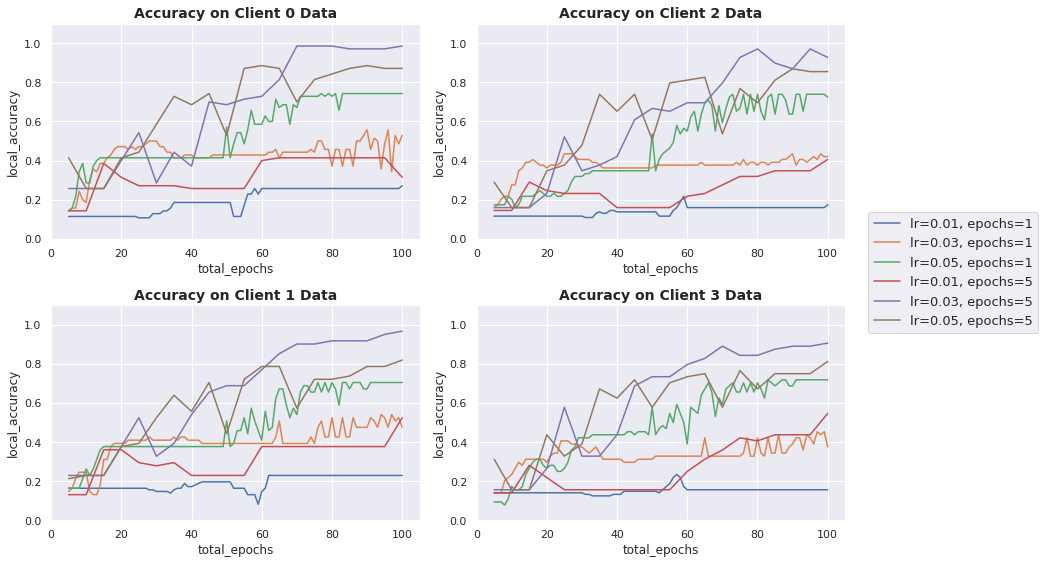

In [4]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))

for ax in axs:
    for subplot in ax:
        subplot.set_xlim([0,105])
        subplot.set_ylim([0,1.1])

for i, data in zip(range(4), [data_cli_1, data_cli_2, data_cli_3, data_cli_4]):
    axs[i%2][i//2].set_title(f'Accuracy on Client {i} Data', fontsize=14, fontweight='bold')
    for df in data:
        sns.lineplot(x=df['total_epochs'],
                     y=df['local_accuracy'],
                     linewidth=1.5,
                     ax=axs[i%2][i//2],
                     err_style=None)
         
fig.tight_layout()

fig.legend(["lr=0.01, epochs=1",
            "lr=0.03, epochs=1",
            "lr=0.05, epochs=1",
            "lr=0.01, epochs=5",
            "lr=0.03, epochs=5",
            "lr=0.05, epochs=5"],
           loc="lower center", 
           bbox_to_anchor=(1.11, +0.4), 
           prop={'size': 13})

plt.savefig('learning_accuracy.png', bbox_inches='tight')